### Homework 1 ###

<hr>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1 ###

#### Rounding error ####

Given $a=1$, $b=100000$, $c=10^n$ where $n=-1,-2,...,8$ we can find both roots of the polynomial:

$$ax^2+bx+c$$

by solving 

$$x_1 = \frac{-b+\sqrt{b^2-4ac}}{2a} $$
$$x_2 = \frac{-b-\sqrt{b^2-4ac}}{2a} $$

Denote $x^n_1, x_2^n$ the corresponding root using $c^n$. Note that as $n$ grows the term in the square brakets tends to $b^2$, since $4ac\to 0$. Althought it might be true in the limit, is not true that for $n=7$ or even $n=8$, but thats not what we obtain when we solve for this roots numerically. The reason behind this is the machine accuracy $\epsilon_m$. Following Numerical recipes in Fortran 77:

 "Pretty much any arithmetic operation among floating numbers should be thought of as introducing an addittional fractional error of at least $\epsilon$. This type of error is called roundoff error."[...]"Roudnoff errors accumulate with increasing amounts of calculations".[...]" Substraction of two nearly equal numbers can vastly increase the roundoff error."

 Note that starting at $n=7$ both roots don't seem to take the term $4ac$ into account, when computing the square root of $b^2$. Starting from that $n$ onwards, the roundoff error makes governs the results for the numerical roots.

<center>

| $n$  |$x_1$ |   $x_2$ |
| --- | --- | --- |
| 1 | -1.0000003385e-06 | -99999.999999
| 2 | -1.0000076145e-07  |-99999.9999999    
| 3 | -9.9971657619e-09  |-99999.99999999   
| 4 | -1.0040821508e-09  |-99999.999999999  
| 5 | -1.0186340660e-10  |-99999.9999999999 
| 6 | -7.2759576142e-12  |-100000.          
| 7 | 0.0000000000e+00   |-100000.          
| 8 | 0.0000000000e+00  | -100000.  

</center>


In [89]:
class Exercise_1:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
    def Method_1(self):
        self.r_1 = (-self.b + np.sqrt(self.b**2 - 4 * self.a * self.c))  / (2)
        self.r_2 = (-self.b - np.sqrt(self.b**2 - 4 * self.a * self.c))  / (2)
        

In [90]:
a, b, c = np.ones(8), 100000 * np.ones(8), (10 *np.ones(8)) ** np.linspace(-1, -8, 8, dtype=int)
Ex1 = Exercise_1(a, b, c)
Ex1.Method_1()
Ex1.r_1, Ex1.r_2

(array([-1.0000003385e-06, -1.0000076145e-07, -9.9971657619e-09,
        -1.0040821508e-09, -1.0186340660e-10, -7.2759576142e-12,
         0.0000000000e+00,  0.0000000000e+00]),
 array([ -99999.999999    ,  -99999.9999999   ,  -99999.99999999  ,
         -99999.999999999 ,  -99999.9999999999, -100000.          ,
        -100000.          , -100000.          ]))

<hr>

### Exercise 2 ###

Prosition: $\phi^n+1=\phi^n-1-\phi^n$ for $\phi=\frac{\sqrt{5}-1}{2}$.

Proof: $$   \phi^{n+_1}=\phi^n-1-\phi^n $$
        $$   \left(\frac{\sqrt{5}-1}{2}\right)^{n+_1}=\left(\frac{\sqrt{5}-1}{2}\right)^n-1-\left(\frac{\sqrt{5}-1}{2}\right)^n $$
        $$ \left(\frac{\sqrt{5}-1}{2}\right) \left(\frac{\sqrt{5}-1}{2}\right)^n = \left(\frac{\sqrt{5}-1}{2}\right)^{n-1} -\left(\frac{\sqrt{5}-1}{2}\right)^n$$
        $$ \left(\frac{\sqrt{5}-1}{2}\right)  = \left(\frac{\sqrt{5}-1}{2}\right)^{-1} -1$$
        $$ \left(\frac{\sqrt{5}-1}{2}\right)  = \left(\frac{2}{\sqrt{5}-1}\right)^{-1} -1$$
        $$ 0  = 0$$


Following Numerical recipies in Fortran 77:

"There is another, different, kind of error that is a characteristic of the program or algorithm used,
independent of the hardware on which the program is executed."[...]"The discrepancy between the true answer and the answer obtained in a practical
calculation is called the truncation error. Truncation error would persist even on a hypothetical, “perfect” computer that had an infinitely accurate representation and no
roundoff error."[...]"Sometimes, however, an otherwise attractive method can be unstable. This means that any roundoff error that becomes “mixed into” the calculation at an early
stage is successively magnified until it comes to swamp the true answer. An unstable method would be useful on a hypothetical, perfect computer; but in this imperfect
world it is necessary for us to require that algorithms be stable — or if unstable that we use them with great caution."

The example computed below shows a clear example of an unstable vs a stable algorithm. We construct 2 sequences for $\{\psi^n\}$, following the two methods proposed in the exercise. We clearly see that when using the unstable algorithm the sequence diverges from its limit point. 



In [6]:
class Exercise2:
    def __init__(self, n):
        self.n = n
        self.ϕ = np.ones(n)
        self.ϕ[0] = 0
        self.ϕ[1] = 0.61803398
        self.ψ = self.ϕ.copy()
        for i in range(2, self.n-2, 1):
            self.ϕ[i+2] = self.ϕ[i] - self.ϕ[i+1]
            self.ψ[i+2] = self.ψ[1]**(i+2)

    def plot(self):
        fig, ax = plt.subplots(figsize=(20, 3))
        grid = range(0, self.n, 1)
        plt.plot(grid, self.ϕ, label='$\phi^n_{Algorithm}$', alpha=0.6)
        plt.plot(grid, self.ψ, label='$\phi^n_{Raising}$', alpha=0.6)
        plt.xlabel('n')
        plt.title('Comparison for different algorithms')
        plt.xticks(grid)
        plt.legend()
        plt.show()

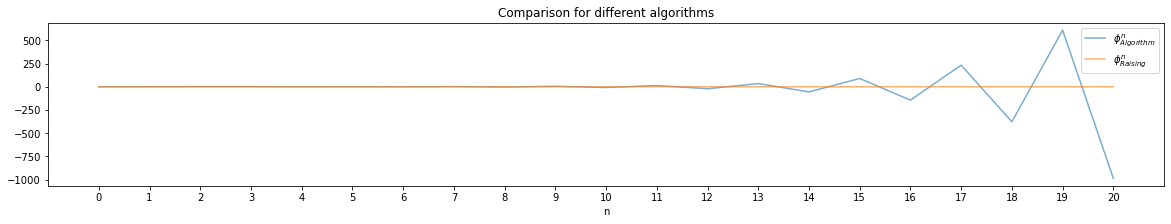

In [7]:
Ex2 = Exercise2(21)
Ex2.φ
Ex2.plot()